# Übung 2a
### Feedforward Neural Network MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Tensorflow-Version:", tf.__version__)
print("Keras-Version:", keras.__version__)

Tensorflow-Version: 2.1.0
Keras-Version: 2.2.4-tf


In [7]:
# Laden des Datensatzes
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [8]:
# Train Test Split
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_full.shape, y_train_full.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Der Trainingsdatensatz besteht aus 60000 Bildern mit jeweils 28x28 Pixeln. Der Testdatensatz aus 10000 solcher Bilder. Die Responsevariable besteht aus einem Integer.

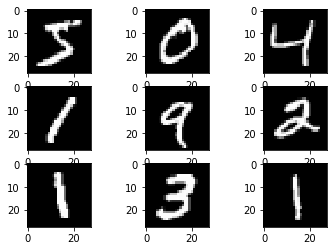

In [10]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train_full[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [11]:
classes = [0,1,2,3,4,5,6,7,8,9]

### Beispielzahlen plotten

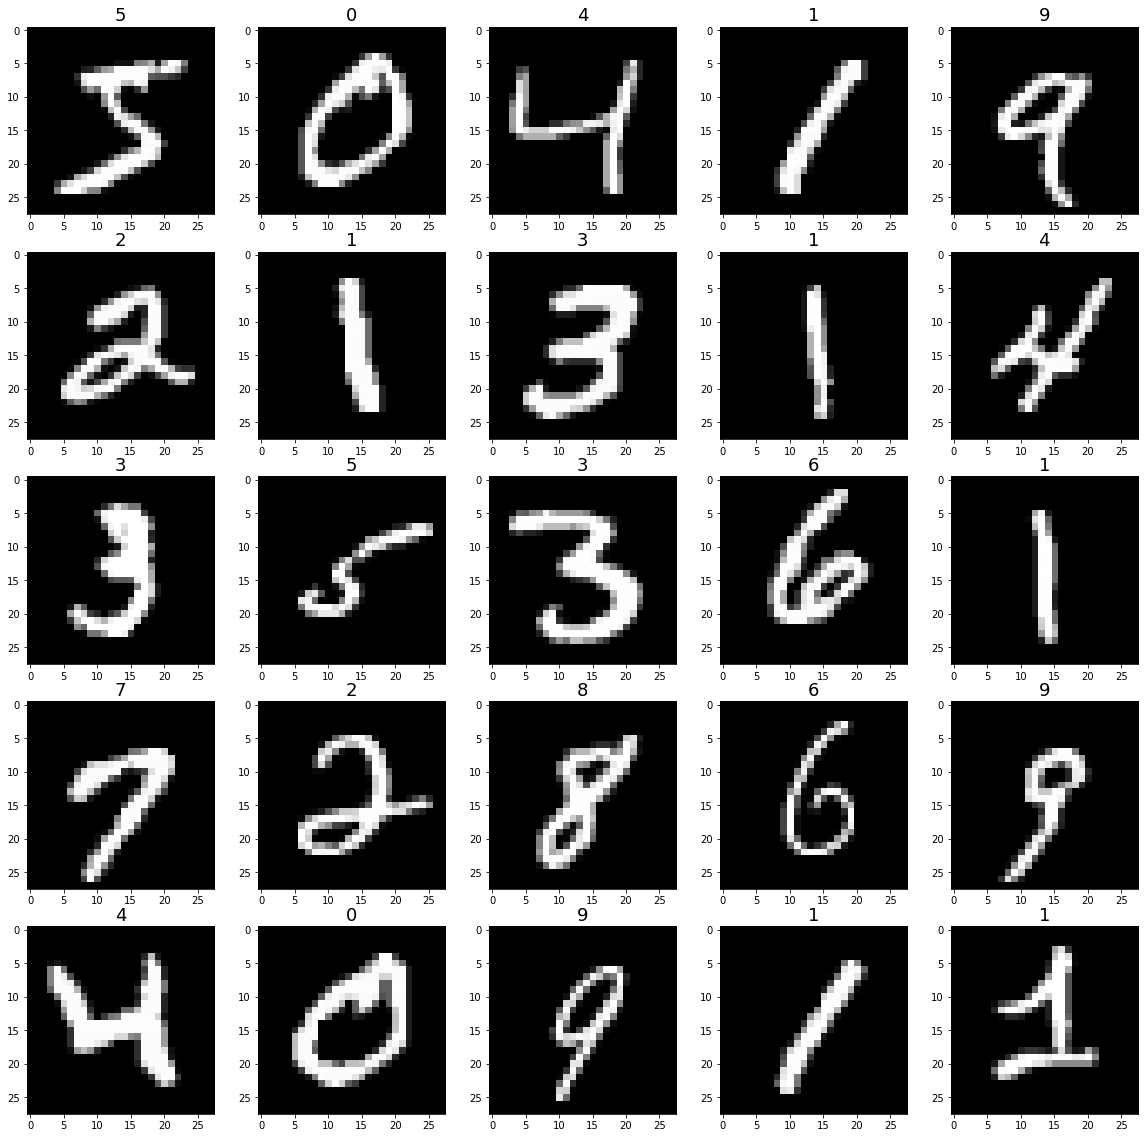

In [12]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(ax.flatten()):
    ax.set_title(classes[y_train_full[i]], fontdict={'fontsize':18})
    ax.imshow(X_train_full[i], cmap='gray')

Zudem erstellen wir noch einen Validierungsdatensatz mit 5000 Bildern.

In [13]:
X_valid, X_train, X_test = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0, X_test / 255.0
y_valid, y_train, y_test = y_train_full[:5000], y_train_full[5000:], y_test

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
y_valid.shape

(5000,)

## FFNN erstellen

In [37]:
model = keras.models.Sequential()

Das Feed Forward Neural Network bestehe aus einem Flatten Layer und 4 darauffolggenden Dense Layern. Bei den ersten 3 Dense Layern habe ich die Aktivierungsfunktion ReLu verwendet und beim Output Layer Softmax.

In [38]:
# Layers zu dem Model hinzufügen
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# Als letzten Layer wird als Aktivierungsfunktion "Softmax" verwendet, da wir klassifizieren wollen und wir dadurch in Summe 1 erhalten

In [39]:
# Summary ausgeben
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Loss Function:
loss_fct = keras.losses.sparse_categorical_crossentropy
# Optimizer:
optim    = keras.optimizers.SGD()
# Metrics
metrics  = [keras.metrics.sparse_categorical_accuracy]

In [41]:
# Kompilieren des Modells
model.compile(loss=loss_fct, optimizer=optim, metrics=metrics)

In [42]:
bs = 64
# Daten in Tensorflow Dataset umwandeln
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(bs)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(bs)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test,  y_test)).batch(bs)

In [43]:
training_1 = model.fit(train_ds, validation_data = valid_ds, epochs=10)

Train for 860 steps, validate for 79 steps
Epoch 1/10
860/860 [==============================] - 5s 6ms/step - loss: 0.7974 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.3556 - val_sparse_categorical_accuracy: 0.9000
Epoch 2/10
860/860 [==============================] - 5s 5ms/step - loss: 0.3199 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.2683 - val_sparse_categorical_accuracy: 0.9234
Epoch 3/10
860/860 [==============================] - 5s 6ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.2290 - val_sparse_categorical_accuracy: 0.9340
Epoch 4/10
860/860 [==============================] - 5s 6ms/step - loss: 0.2261 - sparse_categorical_accuracy: 0.9345 - val_loss: 0.2022 - val_sparse_categorical_accuracy: 0.9410
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.1997 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.1814 - val_sparse_categorical_accuracy: 0.9468
Epoch 6/10
860/860 [==============================] - 5s 

In [44]:
test_1 = model.evaluate(test_ds)

157/157 [==============================] - 1s 6ms/step - loss: 0.1271 - sparse_categorical_accuracy: 0.9613


In [45]:
print("Test loss:\t", test_1[0])
print("Test accuracy:\t", test_1[1])

Test loss:	 0.1271488732364693
Test accuracy:	 0.9613


In [46]:
def plot_training_curves(train_hists, test_hists, metric="sparse_categorical_accuracy"):
    """
    Helper function for plotting training curves from tf-keras history objects
    """ 
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    train_hist_loss     = sum([x.history['loss']     for x in train_hists], [])
    train_hist_val_loss = sum([x.history['val_loss'] for x in train_hists], [])
    ax[0].plot(train_hist_loss)
    ax[0].plot(train_hist_val_loss)
    for x in test_hists:
        ax[0].axhline(y=x[0], color="green", ls="--")
    ax[0].set_title('Loss history')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation', 'Test'], loc='upper right')
    
    train_hist_acc     = sum([x.history[metric]          for x in train_hists], [])
    train_hist_val_acc = sum([x.history['val_' + metric] for x in train_hists], [])
    ax[1].plot(train_hist_acc)
    ax[1].plot(train_hist_val_acc)
    for x in test_hists:
        ax[1].axhline(y=x[1], color="green", ls="--")
    ax[1].set_title('Accuracy history')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation', 'Test'], loc='lower right')
    

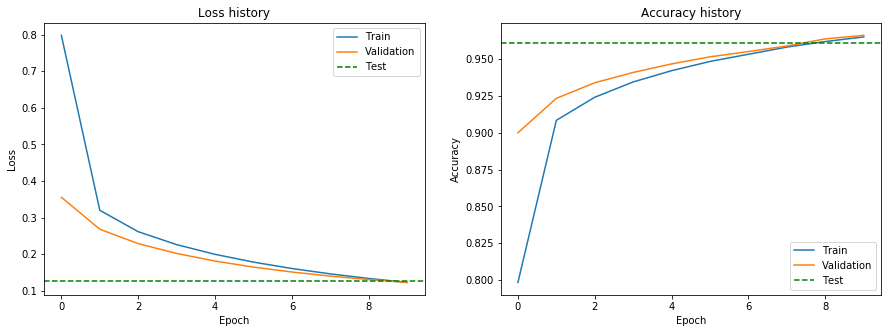

In [47]:
plot_training_curves([training_1], [test_1])

Die Testaccuracy liegt bei knapp über 95 % und somit auf fast gleichem Niveau wie die Trainaccuracy. Mal sehen ob durch einen weiteren Trainingsdurchlauf die Testaccuracy noch verbeessert werden kann.

In [48]:
training_2 = model.fit(train_ds, validation_data = valid_ds, epochs=15)
test_2  = model.evaluate(test_ds)

Train for 860 steps, validate for 79 steps
Epoch 1/15
860/860 [==============================] - 6s 7ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.1163 - val_sparse_categorical_accuracy: 0.9690
Epoch 2/15
860/860 [==============================] - 6s 7ms/step - loss: 0.1052 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9702
Epoch 3/15
860/860 [==============================] - 6s 7ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9720 - val_loss: 0.1055 - val_sparse_categorical_accuracy: 0.9710
Epoch 4/15
860/860 [==============================] - 6s 7ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.1009 - val_sparse_categorical_accuracy: 0.9724
Epoch 5/15
860/860 [==============================] - 5s 6ms/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.0968 - val_sparse_categorical_accuracy: 0.9730
Epoch 6/15
860/860 [==============================] - 5s 

In [49]:
print("Test loss:\t", test_2[0])
print("Test accuracy:\t", test_2[1])

Test loss:	 0.07822026078538097
Test accuracy:	 0.9751


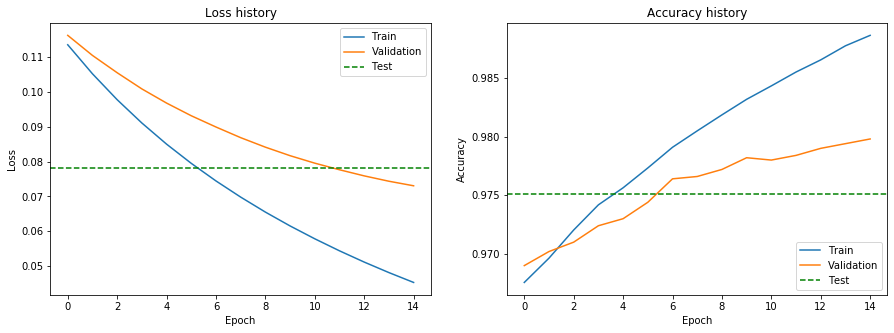

In [50]:
plot_training_curves([training_2], [test_2])

Nach dem 2.Trainingsdurchlauf kann man erkennen, dass man schon im Overfitting drin ist. Die Testaccuracy konnte so aber auf ca. 97,5% gesteigert werden.